In [2]:
weight = 0.5
bias = 0.3

x = torch.arange(0,1,0.02)
y = weight*x+bias

train_len = round(0.8*len(x))
train_data = x[:train_len]
train_labels = y[:train_len]
test_data = x[train_len:]
test_labels = y[train_len:]

In [3]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()#calling the Module __init__, initialising base class 
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True))# wrapping in Paramater() for additional control over the parameters
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True))

    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias

def plot_pred(train_data=train_data,train_labels=train_labels,test_data=test_data,test_labels=test_labels,predictions=None): # predictions will be a tensor containing the predictions made by the model on test data
    plt.figure(figsize=(10,6))
    plt.scatter(train_data,train_labels,c='g',s=5,label="Training Data")
    plt.scatter(test_data,test_labels,c='b',s=5,label="Test Data")
    if predictions is not None:
       plt.scatter(test_data,predictions,c='r',s=5,label="Predictions")
    plt.legend()
    plt.title("Linear Regression Model")
    plt.show()

OrderedDict([('weights', tensor([0.3568])), ('bias', tensor([0.1758]))])
OrderedDict([('weights', tensor([0.3723])), ('bias', tensor([0.2118]))])
OrderedDict([('weights', tensor([0.3844])), ('bias', tensor([0.2394]))])
OrderedDict([('weights', tensor([0.3939])), ('bias', tensor([0.2605]))])
OrderedDict([('weights', tensor([0.4014])), ('bias', tensor([0.2767]))])
OrderedDict([('weights', tensor([0.4072])), ('bias', tensor([0.2891]))])
OrderedDict([('weights', tensor([0.4119])), ('bias', tensor([0.2985]))])
OrderedDict([('weights', tensor([0.4156])), ('bias', tensor([0.3057]))])
OrderedDict([('weights', tensor([0.4187])), ('bias', tensor([0.3111]))])
OrderedDict([('weights', tensor([0.4211])), ('bias', tensor([0.3152]))])
OrderedDict([('weights', tensor([0.4232])), ('bias', tensor([0.3183]))])
OrderedDict([('weights', tensor([0.4249])), ('bias', tensor([0.3207]))])
OrderedDict([('weights', tensor([0.4264])), ('bias', tensor([0.3224]))])
OrderedDict([('weights', tensor([0.4277])), ('bias'

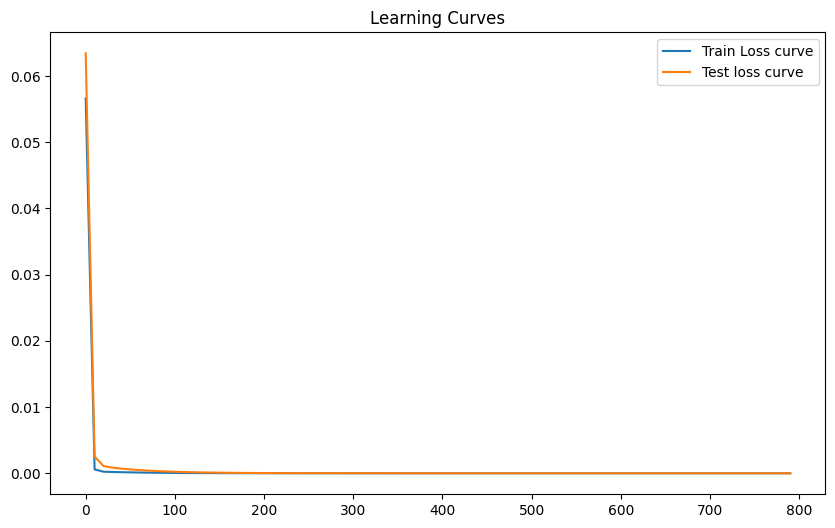

In [4]:
#Training loop
torch.manual_seed(42)

model_train = LinearRegression()
#Loss Function
loss_func = nn.MSELoss()

#Optimiser
optimiser = torch.optim.SGD(params=model_train.parameters(),lr=0.1)

trn_loss = [];tst_loss=[];epoch_count=[]
#Training Loop
"""
Epochs required for diff loss fucntions with seed=42
MSELoss -> 8061 with SGD, lr=0.01, 799 with SGD,lr=0.1
L1Loss -> alternating values with SGD(lr=0.01), ~65000 with lr=0.001
BCELoss -> 3664(SGD), lr=0.01
"""
epochs = 799
for epoch in range(epochs):
    model_train.train()
    y_preds = model_train(train_data)
    optimiser.zero_grad()
    train_loss = loss_func(y_preds,train_labels) #(predictions, actual values)
    train_loss.backward()
    optimiser.step()
    print(model_train.state_dict())
    
    #Test preds
    model_train.eval()
    if epoch%10==0:
        with torch.inference_mode():
            y_preds = model_train(test_data)
        test_loss = loss_func(y_preds,test_labels)
        trn_loss.append(train_loss.detach().numpy()) #could use .item() in cases of single valued tensors
        tst_loss.append(test_loss.detach().numpy())
        epoch_count.append(epoch)
        

plt.figure(figsize=(10,6))
plt.plot(epoch_count,trn_loss,label="Train Loss curve")
plt.plot(epoch_count,tst_loss,label="Test loss curve")
plt.title("Learning Curves")
plt.legend()
plt.show()

In [7]:
model_path = Path.cwd()
model_name = "trained_model_0.pt"
model_destination = model_path/model_name

torch.save(obj=model_train.state_dict(),f=model_destination)